## Running Corncob to look for differential abundances

In [1]:
library(phyloseq)
library(wesanderson)
library(ggplot2)
library(vegan)
library(dplyr)
library(corncob)
library(reshape)
library(RColorBrewer)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename



In [2]:
ps=readRDS("../data/Cornell16S/ps.16S")
ps.norm=readRDS("../data/Cornell16S/ps.16S.norm")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14870 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 14870 taxa by 7 taxonomic ranks ]

In [3]:
# Most interested in the final timepoint, for OM and for PyOM

Factors = expand.grid(Soil_Trtmt=c("Hawaii","Alaska","Utah","New York","Florida"),Amdmt=c("OM","PyOM"))
Factors

Soil_Trtmt,Amdmt
<fct>,<fct>
Hawaii,OM
Alaska,OM
Utah,OM
New York,OM
Florida,OM
Hawaii,PyOM
Alaska,PyOM
Utah,PyOM
New York,PyOM


In [8]:
# Make function to test for differential abundance
# controlling for differential variance
da_analysis = function(Factors){
    Soil_Trtmt=paste(Factors["Soil_Trtmt"])
    Amdmt=paste(Factors["Amdmt"])
    ps.DA = prune_samples(sample_data(ps)$Soil_Trtmt==Soil_Trtmt & sample_data(ps)$Day %in% c("10","26") & (sample_data(ps)$Amdmt == Amdmt | sample_data(ps)$Amdmt == "Soil"),ps)
    ps.DA = prune_taxa(taxa_sums(ps.DA)>0,ps.DA)
    print(ps.DA)
    AbundTaxa = taxa_names(filter_taxa(ps.norm, function(x) mean(x) > 0.0001, TRUE))
    ps.DA = prune_taxa(AbundTaxa,ps.DA)
    print(ps.DA)
    dT = differentialTest(formula = ~ Day+Amdmt,
    phi.formula = ~ Day+Amdmt,
    formula_null = ~ Day,
    phi.formula_null = ~ Day+Amdmt,
    test = "Wald", boot = FALSE,
    data = ps.DA,
    fdr_cutoff = 0.05)
    results=list(dT,Amdmt,Soil_Trtmt)
    return(results)
    }

In [9]:
results = apply(Factors[,],1,da_analysis)
# This produces a list that holds the results of the differential abundance test

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5065 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 5065 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 727 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 727 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3038 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 3038 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 571 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 571 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_t

In [10]:
#saveRDS(results,"../data/Cornell16S/DA.results.16S")
#results = readRDS("../data/Cornell16S/DA.results.16S")

#saveRDS(results,"../data/Cornell16S/DA.results.16S.0.001")
#results = readRDS("../data/Cornell16S/DA.results.16S.0.001")

#saveRDS(results,"../data/Cornell16S/DA.results.16S.0.0001")
#results = readRDS("../data/Cornell16S/DA.results.16S.0.0001")

In [12]:
cutoff=0.05
r = lapply(results, function(l) l[[1]])
sigOTUs = c(
row.names(tax_table(r[[1]]$data)[!is.na(r[[1]]$p_fdr) & r[[1]]$p_fdr<cutoff]),
row.names(tax_table(r[[2]]$data)[!is.na(r[[2]]$p_fdr) & r[[2]]$p_fdr<cutoff]),
row.names(tax_table(r[[3]]$data)[!is.na(r[[3]]$p_fdr) & r[[3]]$p_fdr<cutoff]),
row.names(tax_table(r[[4]]$data)[!is.na(r[[4]]$p_fdr) & r[[4]]$p_fdr<cutoff]),
row.names(tax_table(r[[5]]$data)[!is.na(r[[5]]$p_fdr) & r[[5]]$p_fdr<cutoff]),
#row.names(tax_table(r[[6]]$data)[!is.na(r[[6]]$p_fdr) & r[[6]]$p_fdr<cutoff]), # No significant taxa
row.names(tax_table(r[[7]]$data)[!is.na(r[[7]]$p_fdr) & r[[7]]$p_fdr<cutoff]),
row.names(tax_table(r[[8]]$data)[!is.na(r[[8]]$p_fdr) & r[[8]]$p_fdr<cutoff]),
row.names(tax_table(r[[9]]$data)[!is.na(r[[9]]$p_fdr) & r[[9]]$p_fdr<cutoff]),
row.names(tax_table(r[[10]]$data)[!is.na(r[[10]]$p_fdr) & r[[10]]$p_fdr<cutoff]))
levels(as.factor(sigOTUs))

[1] "sq10"   "sq1000" "sq1001" "sq1002" "sq1003" "sq1004" "sq1005" "sq1006"
  [9] "sq1007" "sq1008" "sq1009" "sq101"  "sq1011" "sq1012" "sq1016" "sq1017"
 [17] "sq1018" "sq1019" "sq102"  "sq1020" "sq1023" "sq1024" "sq1025" "sq1028"
 [25] "sq1029" "sq1030" "sq1031" "sq1033" "sq1034" "sq1035" "sq1036" "sq1037"
 [33] "sq1038" "sq1039" "sq104"  "sq1041" "sq1042" "sq1045" "sq1046" "sq1047"
 [41] "sq1048" "sq1049" "sq1052" "sq1053" "sq1055" "sq1059" "sq1060" "sq1061"
 [49] "sq1062" "sq1063" "sq1065" "sq1068" "sq107"  "sq1072" "sq1074" "sq1075"
 [57] "sq1078" "sq1080" "sq1082" "sq1083" "sq1085" "sq1086" "sq1088" "sq109" 
 [65] "sq1090" "sq1091" "sq1092" "sq1093" "sq1094" "sq1096" "sq1098" "sq1099"
 [73] "sq11"   "sq110"  "sq1100" "sq1103" "sq1104" "sq1105" "sq1107" "sq1108"
 [81] "sq1109" "sq111"  "sq1111" "sq1112" "sq1116" "sq1117" "sq1118" "sq112" 
 [89] "sq1121" "sq1124" "sq1125" "sq1126" "sq1127" "sq1128" "sq1129" "sq1131"
 [97] "sq1133" "sq1134" "sq1136" "sq1138" "sq1139" "sq1141" "sq1142" "sq1143"
[105] "sq1144" "sq1147" "sq1151" "sq1152" "sq1153" "sq1154" "sq1158" "sq1159"
[113] "sq116"  "sq1163" "sq1165" "sq1167" "sq1168" "sq1169" "sq1171" "sq1176"
[121] "sq1177" "sq1178" "sq118"  "sq1180" "sq1181" "sq1182" "sq1184" "sq1185"
[129] "sq1189" "sq119"  "sq1190" "sq1192" "sq1195" "sq1196" "sq1197" "sq1198"
[137] "sq1199" "sq12"   "sq120"  "sq1200" "sq1203" "sq1204" "sq1205" "sq1206"
[145] "sq1209" "sq121"  "sq1211" "sq1212" "sq1214" "sq1217" "sq1220" "sq1223"
[153] "sq1224" "sq1226" "sq1228" "sq123"  "sq1231" "sq1232" "sq1233" "sq1234"
[161] "sq1236" "sq1239" "sq1241" "sq1243" "sq1248" "sq125"  "sq1250" "sq1252"
[169] "sq1254" "sq1255" "sq1256" "sq1259" "sq126"  "sq1260" "sq1268" "sq127" 
[177] "sq1270" "sq1271" "sq1277" "sq128"  "sq1280" "sq1281" "sq1282" "sq1283"
[185] "sq1285" "sq1286" "sq1288" "sq1289" "sq129"  "sq1291" "sq1295" "sq1296"
[193] "sq1297" "sq1298" "sq1299" "sq13"   "sq130"  "sq1301" "sq1305" "sq131" 
[201] "sq1310" "sq1311" "sq1316" "sq132"  "sq1320" "sq1322" "sq1327" "sq133" 
[209] "sq1330" "sq1331" "sq1334" "sq1339" "sq134"  "sq1342" "sq1347" "sq1348"
[217] "sq1349" "sq135"  "sq1353" "sq1356" "sq136"  "sq1361" "sq1363" "sq1365"
[225] "sq1366" "sq1367" "sq1371" "sq1373" "sq1376" "sq1377" "sq138"  "sq1383"
[233] "sq1388" "sq139"  "sq1391" "sq1392" "sq1396" "sq1399" "sq140"  "sq1405"
[241] "sq1406" "sq1409" "sq141"  "sq1424" "sq143"  "sq144"  "sq1440" "sq145" 
[249] "sq1457" "sq146"  "sq1461" "sq1464" "sq1473" "sq148"  "sq1480" "sq1486"
[257] "sq1489" "sq149"  "sq1498" "sq150"  "sq1500" "sq1509" "sq151"  "sq1510"
[265] "sq1511" "sq1516" "sq1519" "sq152"  "sq1520" "sq1523" "sq1528" "sq153" 
[273] "sq154"  "sq1544" "sq1547" "sq1549" "sq155"  "sq1554" "sq1555" "sq156" 
[281] "sq1560" "sq1569" "sq157"  "sq1571" "sq1574" "sq1579" "sq158"  "sq1580"
[289] "sq1581" "sq1582" "sq1587" "sq159"  "sq1595" "sq16"   "sq160"  "sq1602"
[297] "sq1609" "sq161"  "sq1616" "sq1618" "sq1623" "sq164"  "sq165"  "sq1658"
[305] "sq1660" "sq1672" "sq168"  "sq1681" "sq1688" "sq169"  "sq1694" "sq17"  
[313] "sq170"  "sq1706" "sq171"  "sq1714" "sq1720" "sq1723" "sq1725" "sq173" 
[321] "sq174"  "sq175"  "sq1754" "sq1756" "sq177"  "sq1778" "sq1786" "sq1788"
[329] "sq179"  "sq18"   "sq1817" "sq182"  "sq1836" "sq184"  "sq186"  "sq188" 
[337] "sq189"  "sq19"   "sq190"  "sq191"  "sq192"  "sq193"  "sq198"  "sq199" 
[345] "sq2"    "sq20"   "sq202"  "sq203"  "sq204"  "sq205"  "sq207"  "sq208" 
[353] "sq21"   "sq211"  "sq212"  "sq214"  "sq215"  "sq216"  "sq217"  "sq218" 
[361] "sq219"  "sq22"   "sq220"  "sq222"  "sq223"  "sq224"  "sq225"  "sq226" 
[369] "sq227"  "sq228"  "sq229"  "sq23"   "sq231"  "sq234"  "sq235"  "sq238" 
[377] "sq239"  "sq242"  "sq243"  "sq244"  "sq245"  "sq246"  "sq247"  "sq248" 
[385] "sq249"  "sq25"   "sq255"  "sq256"  "sq257"  "sq258"  "sq259"  "sq261" 
[393] "sq262"  "sq263"  "sq264"  "sq265"  "sq266"  "sq268"  "sq269"  "sq27"  
[401] "sq274"  "sq275"  "sq276"  "sq278"  "sq279"  "sq28"   "sq280"  "sq282" 
[409] "sq283"  "sq285"  

In [13]:
data.frame(sigOTUs) %>%
group_by(sigOTUs)%>%
summarize(Count=n())%>%
arrange(-Count)

sigOTUs,Count
<fct>,<int>
sq2,7
sq27,6
sq56,5
sq7,5
sq71,5
sq9,5
sq94,5
sq10,4
sq1116,4


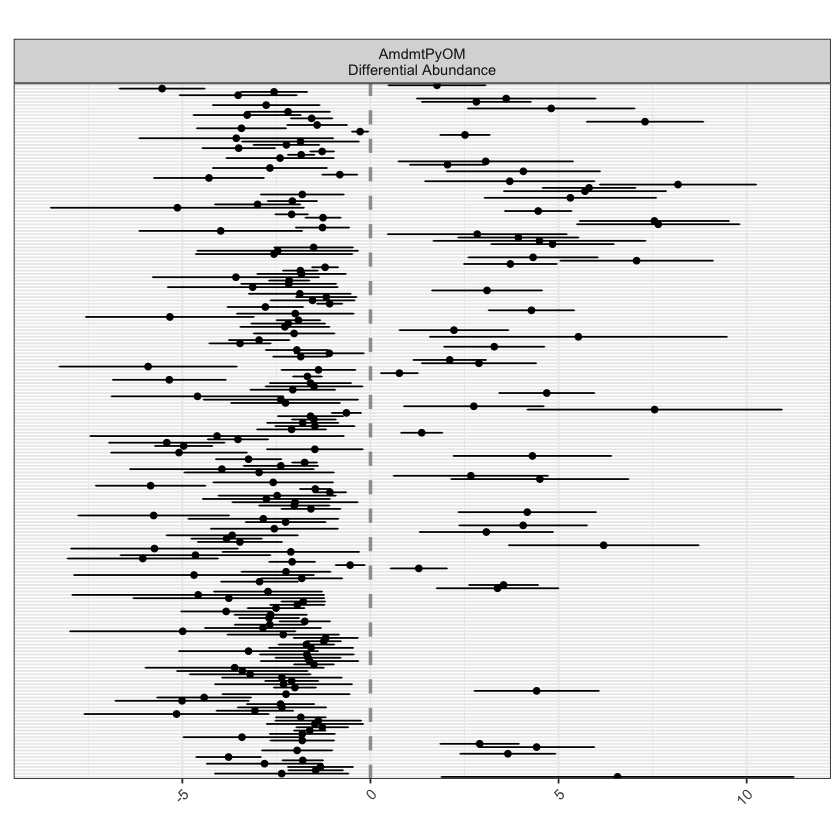

In [14]:
p = plot(r[[10]])
p = p + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())
p

In [ ]:
# Ok, so I think this is working pretty well
# What I'd want to do is extract the significant responders
# Then I'd want to also extract the results from their model
# Then gather that into one big dataframe, probably

In [15]:
# For each list, and for each significant taxon in that list, extract the mu coefficients and the p_fdr
# Currently not running for 6, because no significant taxa

df = data.frame()
for (i in c(1:5,7:10)){
    r = results[[i]][[1]]
    Amdmt = try(results[[i]][[2]])
    Soil = try(results[[i]][[3]])
    for (j in 1:length(r$significant_taxa)){
        sig_models = try(r$significant_models[[j]],silent=TRUE)
        mu = try(data.frame(t(as.matrix(sig_models$coefficients[3,]))),silent=TRUE)
        p_fdr = try(r$p_fdr[r$significant_taxa][j],silent=TRUE)
        mu$p_fdr = try(p_fdr,silent=TRUE)
        mu$Amdmt = try(Amdmt,silent=TRUE)
        mu$Soil = try(Soil,silent=TRUE)
        row.names(mu)= try(paste(row.names(try(data.frame(p_fdr))),"_",i,sep=""),silent=TRUE)
        df = try(rbind(df,mu))
    }
}

In [16]:
df$OTU = row.names(df)
df$OTU = sub("_[0-9]","",df$OTU)
head(df$OTU)

[1] "sq2"     "sq10"    "sq85"    "sq96"    "sq156"   "sq257"   "sq457"  
   [8] "sq462"   "sq673"   "sq687"   "sq719"   "sq1061"  "sq1199"  "sq1234" 
  [15] "sq2"     "sq5"     "sq8"     "sq16"    "sq17"    "sq18"    "sq20"   
  [22] "sq21"    "sq27"    "sq33"    "sq40"    "sq42"    "sq44"    "sq55"   
  [29] "sq56"    "sq74"    "sq79"    "sq81"    "sq92"    "sq94"    "sq111"  
  [36] "sq119"   "sq126"   "sq133"   "sq136"   "sq138"   "sq145"   "sq150"  
  [43] "sq151"   "sq153"   "sq188"   "sq189"   "sq193"   "sq207"   "sq215"  
  [50] "sq231"   "sq244"   "sq245"   "sq248"   "sq266"   "sq269"   "sq282"  
  [57] "sq296"   "sq303"   "sq310"   "sq311"   "sq322"   "sq327"   "sq344"  
  [64] "sq348"   "sq357"   "sq359"   "sq363"   "sq387"   "sq390"   "sq393"  
  [71] "sq399"   "sq401"   "sq411"   "sq433"   "sq445"   "sq448"   "sq449"  
  [78] "sq450"   "sq451"   "sq478"   "sq482"   "sq489"   "sq492"   "sq511"  
  [85] "sq518"   "sq541"   "sq550"   "sq588"   "sq614"   "sq629"   "sq664"  
  [92] "sq669"   "sq674"   "sq706"   "sq707"   "sq721"   "sq727"   "sq740"  
  [99] "sq742"   "sq759"   "sq769"   "sq775"   "sq787"   "sq792"   "sq794"  
 [106] "sq803"   "sq811"   "sq826"   "sq827"   "sq838"   "sq851"   "sq856"  
 [113] "sq866"   "sq877"   "sq891"   "sq892"   "sq897"   "sq905"   "sq906"  
 [120] "sq940"   "sq941"   "sq944"   "sq957"   "sq958"   "sq962"   "sq973"  
 [127] "sq975"   "sq1005"  "sq1011"  "sq1047"  "sq1065"  "sq1080"  "sq1104" 
 [134] "sq1105"  "sq1112"  "sq1159"  "sq1168"  "sq1192"  "sq1200"  "sq1220" 
 [141] "sq1226"  "sq1228"  "sq1250"  "sq1277"  "sq1296"  "sq1464"  "sq2"    
 [148] "sq7"     "sq8"     "sq9"     "sq27"    "sq28"    "sq33"    "sq34"   
 [155] "sq37"    "sq41"    "sq43"    "sq47"    "sq49"    "sq54"    "sq64"   
 [162] "sq71"    "sq73"    "sq77"    "sq78"    "sq85"    "sq88"    "sq94"   
 [169] "sq96"    "sq112"   "sq118"   "sq119"   "sq129"   "sq133"   "sq139"  
 [176] "sq141"   "sq144"   "sq146"   "sq154"   "sq155"   "sq158"   "sq161"  
 [183] "sq168"   "sq170"   "sq171"   "sq192"   "sq202"   "sq205"   "sq223"  
 [190] "sq224"   "sq225"   "sq226"   "sq238"   "sq247"   "sq249"   "sq258"  
 [197] "sq262"   "sq274"   "sq279"   "sq280"   "sq287"   "sq294"   "sq301"  
 [204] "sq307"   "sq308"   "sq312"   "sq320"   "sq326"   "sq330"   "sq334"  
 [211] "sq340"   "sq345"   "sq348"   "sq351"   "sq354"   "sq362"   "sq366"  
 [218] "sq373"   "sq376"   "sq380"   "sq396"   "sq410"   "sq413"   "sq416"  
 [225] "sq418"   "sq420"   "sq429"   "sq432"   "sq443"   "sq452"   "sq456"  
 [232] "sq472"   "sq476"   "sq484"   "sq485"   "sq491"   "sq497"   "sq498"  
 [239] "sq512"   "sq535"   "sq536"   "sq548"   "sq549"   "sq556"   "sq569"  
 [246] "sq573"   "sq575"   "sq577"   "sq578"   "sq580"   "sq589"   "sq595"  
 [253] "sq597"   "sq601"   "sq615"   "sq616"   "sq618"   "sq625"   "sq627"  
 [260] "sq631"   "sq632"   "sq634"   "sq635"   "sq647"   "sq652"   "sq653"  
 [267] "sq661"   "sq667"   "sq671"   "sq678"   "sq684"   "sq685"   "sq690"  
 [274] "sq697"   "sq699"   "sq700"   "sq702"   "sq704"   "sq712"   "sq733"  
 [281] "sq736"   "sq737"   "sq746"   "sq753"   "sq754"   "sq757"   "sq763"  
 [288] "sq767"   "sq773"   "sq776"   "sq777"   "sq785"   "sq786"   "sq801"  
 [295] "sq805"   "sq809"   "sq823"   "sq828"   "sq830"   "sq831"   "sq832"  
 [302] "sq835"   "sq836"   "sq839"   "sq841"   "sq843"   "sq845"   "sq847"  
 [309] "sq849"   "sq864"   "sq868"   "sq876"   "sq879"   "sq886"   "sq887"  
 [316] "sq908"   "sq911"   "sq913"   "sq919"   "sq926"   "sq930"   "sq939"  
 [323] "sq945"   "sq947"   "sq961"   "sq963"   "sq967"   "sq976"   "sq980"  
 [330] "sq1002"  "sq1012"  "sq1020"  "sq1024"  "sq1029"  "sq1031"  "sq1038" 
 [337] "sq1045"  "sq1053"  "sq1059"  "sq1074"  "sq1078"  "sq1082"  "sq1083" 
 [344] "sq1091"  "sq1098"  "sq1100"  "sq1103"  "sq1109"  "sq1121"  "sq1127" 
 [351] "sq1128"  "sq1134"  "sq1141"  "sq1151"  "sq1154"  "sq1158"  "sq1165" 
 [358] "sq1181"  "sq1184"  "sq1185"  "sq1190"  "sq1195"  "sq1196"  "sq1203" 

In [17]:
colnames(df) = c("log2FC","se","t","p","p_fdr","Amdmt","Soil_Trtmt","OTU")
dim(df)
head(df)
# Final summary of results - actually I think this is all we want.

[1] 1568    8

,log2FC,se,t,p,p_fdr,Amdmt,Soil_Trtmt,OTU
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
sq2_1,3.369323,0.4343686,7.756830,1.541447e-05,4.719674e-12,OM,Hawaii,sq2
sq10_1,1.168140,0.2588386,4.513006,1.120373e-03,1.154737e-03,OM,Hawaii,sq10
sq85_1,3.324437,0.9653103,3.443905,6.290104e-03,3.453007e-02,OM,Hawaii,sq85
sq96_1,3.588765,0.7498876,4.785737,7.393191e-04,4.616792e-04,OM,Hawaii,sq96
sq156_1,1.479618,0.3404152,4.346510,1.451489e-03,1.874243e-03,OM,Hawaii,sq156
sq257_1,7.502741,2.2691511,3.306409,7.927240e-03,3.939928e-02,OM,Hawaii,sq257


In [124]:
SigOTUs = levels(as.factor(df$OTU))
pruned = prune_taxa(SigOTUs,ps.norm)
taxtab = data.frame(tax_table(pruned))
taxtab$OTU = c(taxa_names(pruned))
joined = merge(taxtab,df,by=c("OTU"))

In [125]:
ignoreList = c("","uncultured","uncultured bacterium","uncultured soil bacterium","uncultured forest soil bacterium",
               "uncultured actinobacterium","uncultured planctomycete","uncultured Chloroflexi bacterium","uncultured Syntrophobacteraceae bacterium")

#Burkholderia-Caballeronia-Paraburkholderia
#Colstridium senu stricto 10
#Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium
#Plactomycetales bacterium Ellin 6207

joined$Phylum = ifelse(joined$Phylum=="WPS-2","Eremiobacterota (WPS-2)",paste(joined$Phylum))

joined = joined %>%
    mutate(Name = ifelse(Genus %in% ignoreList |is.na(Genus),ifelse(Family %in% ignoreList |is.na(Family),ifelse(Class %in% ignoreList |is.na(Class),ifelse(Phylum %in% ignoreList |is.na(Phylum),paste(OTU),
                            paste(Phylum)),paste(Class)),paste(Family)),paste(Genus)))%>%
    mutate(Name = ifelse(Name == "Burkholderia-Caballeronia-Paraburkholderia","*Burkholderia",Name))%>%
    mutate(Name = ifelse(Name == "Clostridium sensu stricto 10","Clostridium",Name))%>%
    mutate(Name = ifelse(Name == "Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium","*Rhizobium",Name))%>%
    mutate(Name = ifelse(Name == "Planctomycetales bacterium Ellin6207","Planctomycetales",Name))%>%
    mutate(Name = ifelse(Name == "uncultured thaumarchaeote","Thaumarchaeota",Name))
head(joined$Name)

[1] "*Burkholderia"  "*Burkholderia"  "*Burkholderia"  "Bradyrhizobium"
[5] "Anaerocolumna"  "SH-PL14"

In [126]:
TaxonOrder = joined %>%
    select(Phylum,Genus,OTU,Name)%>%
    arrange(Phylum)
OTUOrder = unique(TaxonOrder$OTU)
GenusOrder = unique(TaxonOrder$Genus)
NameOrder = unique(TaxonOrder$Name)
joined$OTU = factor(joined$OTU, levels = OTUOrder)
joined$Genus = factor(joined$Genus, levels = GenusOrder)
joined$Name = factor(joined$Name, levels = NameOrder)
joined$Soil_Trtmt = factor(joined$Soil_Trtmt, levels = c("Hawaii","Alaska","Utah","New York","Florida"))

levels(joined$Soil_Trtmt)[levels(joined$Soil_Trtmt)=="Hawaii"] = "Hydrudand"
levels(joined$Soil_Trtmt)[levels(joined$Soil_Trtmt)=="New York"] = "Fragiudept"
levels(joined$Soil_Trtmt)[levels(joined$Soil_Trtmt)=="Alaska"] = "Cryaquept"
levels(joined$Soil_Trtmt)[levels(joined$Soil_Trtmt)=="Utah"] = "Haplocalcid"
levels(joined$Soil_Trtmt)[levels(joined$Soil_Trtmt)=="Florida"] = "Quartzipsamment"

joined.plot = joined %>%
    filter(log2FC>0)

joined.plot2 = joined %>%
    filter(log2FC<0)

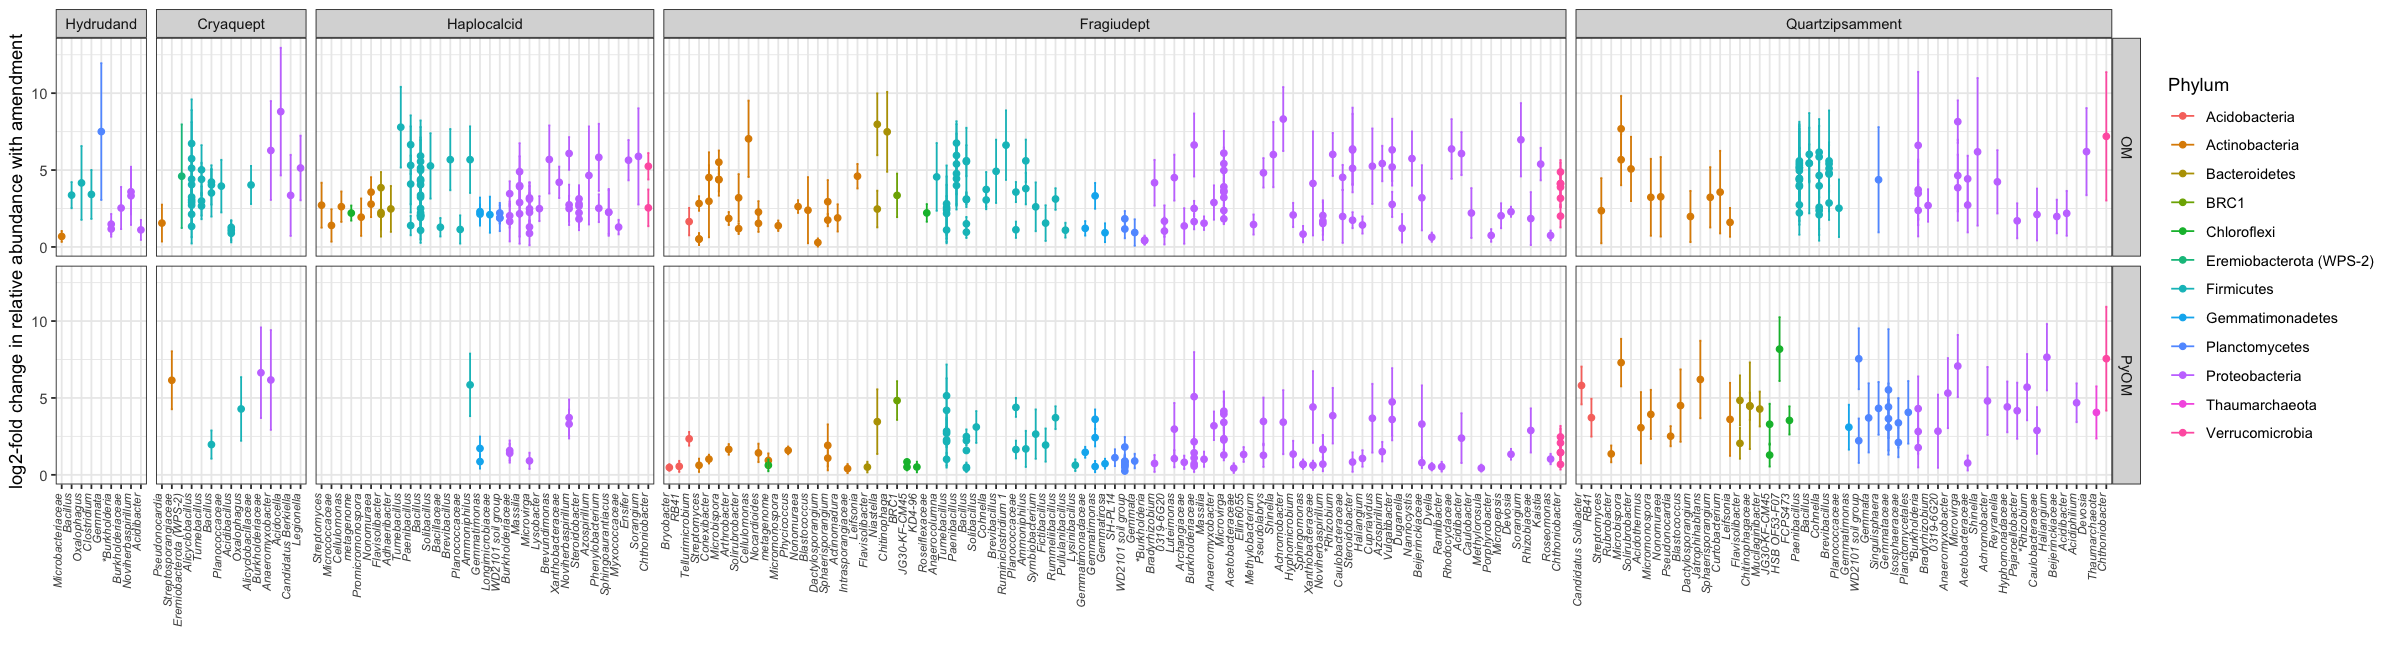

In [129]:
options(repr.plot.width=20, repr.plot.height=5.5)

#palette=brewer.pal(9,"Set1")

p = ggplot(joined.plot,aes(y=log2FC,color=Phylum,x=Name))
p = p + theme_bw()
p = p + geom_point() + facet_grid(~Amdmt~Soil_Trtmt,scales="free_x",space="free_x")
#p = p + geom_point() + facet_wrap(~Soil_Trtmt~Amdmt,scales="free_x")
p = p + geom_errorbar(aes(ymax=log2FC+1.96*se,ymin=log2FC-1.96*se),width=0.2)
p = p + theme(axis.text.x=element_text(angle=90,size=7,face="italic",vjust=0,hjust=1))
#p = p + theme(strip.text.x=element_text(angle=90,size=10))
p = p + ylab("log2-fold change in relative abundance with amendment") + xlab("")
#p = p + scale_color_manual(values=palette)
p

# Overall, pretty good, though - conclusion - some taxa are consistent reponders

In [145]:
# Want to report total unique OTUs that were positive responders

summary1=joined.plot%>% 
    group_by(Amdmt)%>%
    distinct(OTU)%>%
    summarize(Count=n())%>%
    arrange(-Count)

summary3=joined.plot%>% 
    group_by(Soil_Trtmt,Amdmt)%>%
    distinct(OTU)%>%
    group_by(Soil_Trtmt,OTU)%>%
    summarize(Count=n())%>%
    filter(Count==2)%>%
    summarize(n())

summary2=joined.plot%>%
    filter(!(Genus %in% ignoreList))%>%
    group_by(Genus,Amdmt,Soil_Trtmt)%>%
    summarize(Count=n())%>%
    arrange(Genus,-Count)%>%
    group_by(Genus,Amdmt)%>%
    summarize(Sum=sum(Count),Soils=n())%>%
    arrange(Genus,Amdmt)

summary1
summary3
summary2


Warning message:
“Factor `Genus` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `Genus` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `Genus` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `Genus` contains implicit NA, consider using `forcats::fct_explicit_na`”

Amdmt,Count
<chr>,<int>
OM,258
PyOM,162


Soil_Trtmt,n()
<fct>,<int>
Cryaquept,2
Haplocalcid,7
Fragiudept,64
Quartzipsamment,2


Warning message:
“Factor `Genus` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `Genus` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `Genus` contains implicit NA, consider using `forcats::fct_explicit_na`”

Genus,Amdmt,Sum,Soils
<fct>,<chr>,<int>,<int>
Bryobacter,PyOM,1,1
Candidatus Solibacter,PyOM,1,1
RB41,PyOM,2,2
Tellurimicrobium,OM,1,1
Tellurimicrobium,PyOM,1,1
Streptomyces,OM,5,3
Streptomyces,PyOM,1,1
Rubrobacter,PyOM,1,1
Conexibacter,OM,2,1


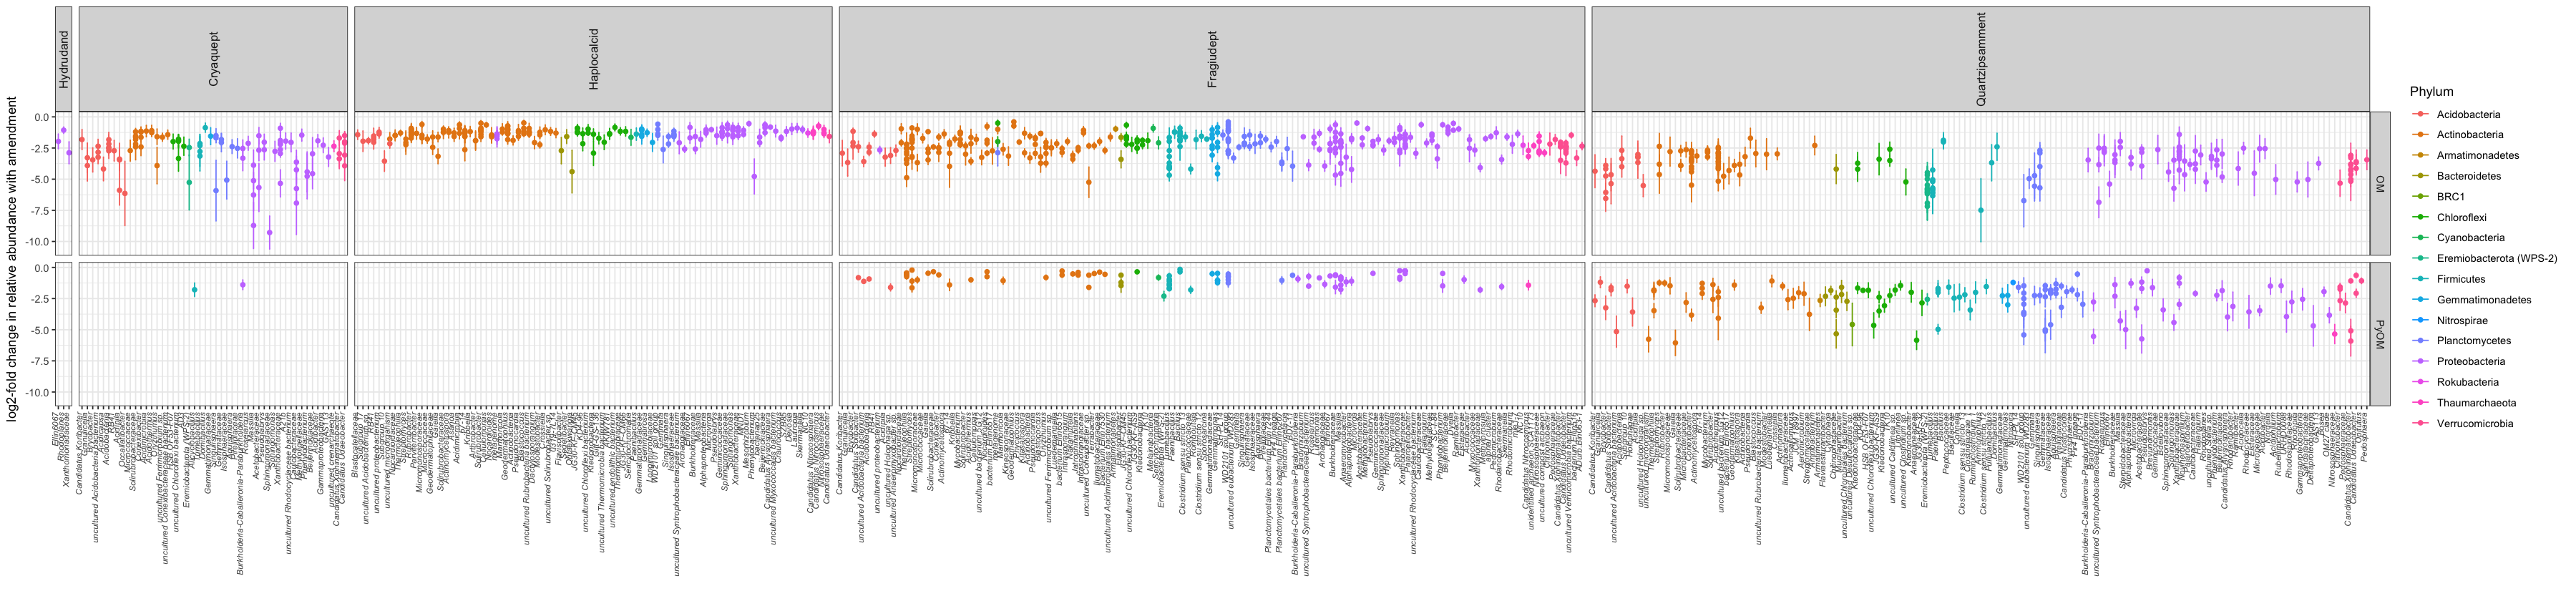

In [26]:
options(repr.plot.width=30, repr.plot.height=7)

#palette=brewer.pal(9,"Set1")

p = ggplot(joined.plot2,aes(y=log2FC,color=Phylum,x=Name))
p = p + theme_bw()
p = p + geom_point() + facet_grid(~Amdmt~Soil_Trtmt,scales="free_x",space="free_x")
p = p + geom_errorbar(aes(ymax=log2FC+se,ymin=log2FC-se),width=0.2)
p = p + theme(axis.text.x=element_text(angle=90,size=7,face="italic",vjust=0,hjust=1))
p = p + theme(strip.text.x=element_text(angle=90,size=10))
p = p + ylab("log2-fold change in relative abundance with amendment") + xlab("")
#p = p + scale_color_manual(values=palette)
p


In [58]:
# Want to make analogous figures to ISME paper
# So, need to match up OTUs across days
# Goal: OTU taxonomy, Soil, Day, Response to PyOM, Response to OM

d.cast.l2FC = cast(joined, Soil_Trtmt+OTU+Phylum~Amdmt,value=c("log2FC"))
d.cast.SE = cast(joined, Soil_Trtmt+OTU+Phylum~Amdmt,value=c("se"))
d.cast.padj = cast(joined, Soil_Trtmt+OTU+Phylum~Amdmt,value=c("p_fdr"))

d.cast = merge(d.cast.l2FC,d.cast.SE,by=c("Soil_Trtmt","OTU","Phylum"))
d.cast = merge(d.cast,d.cast.padj,by=c("Soil_Trtmt","OTU","Phylum"))

colnames(d.cast) = c(colnames(d.cast)[1:3],"logFC.OM","logFC.PyOM","logFC.SE.OM","logFC.SE.PyOM","logFC.padj.OM","logFC.padj.PyOM")
head(d.cast)

Soil_Trtmt,OTU,Phylum,logFC.OM,logFC.PyOM,logFC.SE.OM,logFC.SE.PyOM,logFC.padj.OM,logFC.padj.PyOM
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cryaquept,sq1005,Proteobacteria,-2.122200,NA,0.5601014,NA,6.747650e-04,NA
Cryaquept,sq1011,Firmicutes,6.724129,NA,1.4673328,NA,3.585367e-05,NA
Cryaquept,sq1047,Actinobacteria,-1.639318,NA,0.5559804,NA,9.545062e-03,NA
Cryaquept,sq1065,Planctomycetes,-1.817390,NA,0.4782945,NA,6.565161e-04,NA
Cryaquept,sq1080,Verrucomicrobia,-2.112497,NA,0.9254427,NA,4.890004e-02,NA
Cryaquept,sq1104,Acidobacteria,-1.820005,NA,0.8023137,NA,4.960518e-02,NA


Warning message:
“Using shapes for an ordinal variable is not advised”

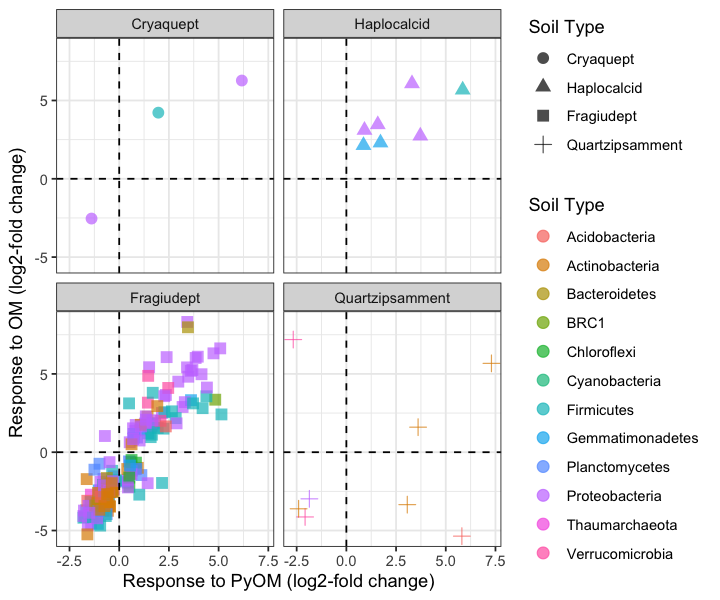

In [60]:
options(repr.plot.width=6, repr.plot.height=5)
d.plot = d.cast%>%
    filter(!is.na(logFC.padj.PyOM) & !is.na(logFC.padj.OM))

d.plot$Soil_Name=d.plot$Soil_Trtmt

d.plot$Soil_Name = ordered(d.plot$Soil_Name, levels = c("Hydrudand", "Cryaquept", "Haplocalcid","Fragiudept","Quartzipsamment"))

p = ggplot(d.plot,aes(x=logFC.PyOM,y=logFC.OM,shape=Soil_Name,color=Phylum,fill=Soil_Name))
p = p + geom_point(size=3,alpha=0.7)
p = p + geom_hline(yintercept = 0.0, linetype=2) + theme_bw()
p = p + geom_vline(xintercept = 0.0, linetype=2) + theme_bw()
p = p + xlab("Response to PyOM (log2-fold change)")
p = p + ylab("Response to OM (log2-fold change)")

#palette = c(wes_palette("Darjeeling1"),wes_palette("Darjeeling2")[2:4])
#palette = palette[c(2,1,4,3,5,6)]
#p = p + scale_fill_manual(values=palette)+ scale_color_manual(values=palette) + scale_shape_manual(values=c(21:25))
p = p + guides(shape = guide_legend(title="Soil Type"), color=guide_legend(title="Soil Type"), fill=guide_legend(title="Soil Type"))
p = p + facet_wrap(~Soil_Name)
p


In [154]:
colnames(d.cast)

[1] "Soil_Trtmt"      "OTU"             "Phylum"          "logFC.OM"       
[5] "logFC.PyOM"      "logFC.SE.OM"     "logFC.SE.PyOM"   "logFC.padj.OM"  
[9] "logFC.padj.PyOM"

In [166]:
levels(sample_data(Relabunds)$Day)

[1] "1"  "10" "26"

In [186]:
Relabunds = subset_taxa(ps.norm, taxa_names(ps.norm) %in% d.cast$OTU)
Relabunds = psmelt(Relabunds)
Relabunds = Relabunds %>%
    #filter(Amdmt=="Soil")%>%
    filter(Day!=1)%>%
    group_by(Soil_Trtmt,OTU)%>%
    summarize(MeanAbund = mean(Abundance))%>%
    filter(MeanAbund>0)

In [187]:
levels(Relabunds$Soil_Trtmt) = c("Hydrudand", "Cryaquept", "Haplocalcid","Fragiudept","Quartzipsamment")

In [188]:
head(Relabunds)

Soil_Trtmt,OTU,MeanAbund
<fct>,<chr>,<dbl>
Hydrudand,sq10,3.666545e-03
Hydrudand,sq100,4.567596e-04
Hydrudand,sq1000,1.975566e-06
Hydrudand,sq1004,6.747394e-05
Hydrudand,sq1005,3.492081e-04
Hydrudand,sq1006,4.088899e-04


In [189]:
d.cast.2 = merge(d.cast,Relabunds,by=c("Soil_Trtmt","OTU"))
dim(d.cast.2)
dim(d.cast)

[1] 1251   10

[1] 1362    9

In [190]:
head(d.cast.2)

Soil_Trtmt,OTU,Phylum,logFC.OM,logFC.PyOM,logFC.SE.OM,logFC.SE.PyOM,logFC.padj.OM,logFC.padj.PyOM,MeanAbund
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cryaquept,sq1005,Proteobacteria,-2.122200,NA,0.5601014,NA,6.747650e-04,NA,0.0001696220
Cryaquept,sq1011,Firmicutes,6.724129,NA,1.4673328,NA,3.585367e-05,NA,0.0008740781
Cryaquept,sq1047,Actinobacteria,-1.639318,NA,0.5559804,NA,9.545062e-03,NA,0.0004453200
Cryaquept,sq1065,Planctomycetes,-1.817390,NA,0.4782945,NA,6.565161e-04,NA,0.0002312445
Cryaquept,sq1080,Verrucomicrobia,-2.112497,NA,0.9254427,NA,4.890004e-02,NA,0.0002066720
Cryaquept,sq1104,Acidobacteria,-1.820005,NA,0.8023137,NA,4.960518e-02,NA,0.0002214497


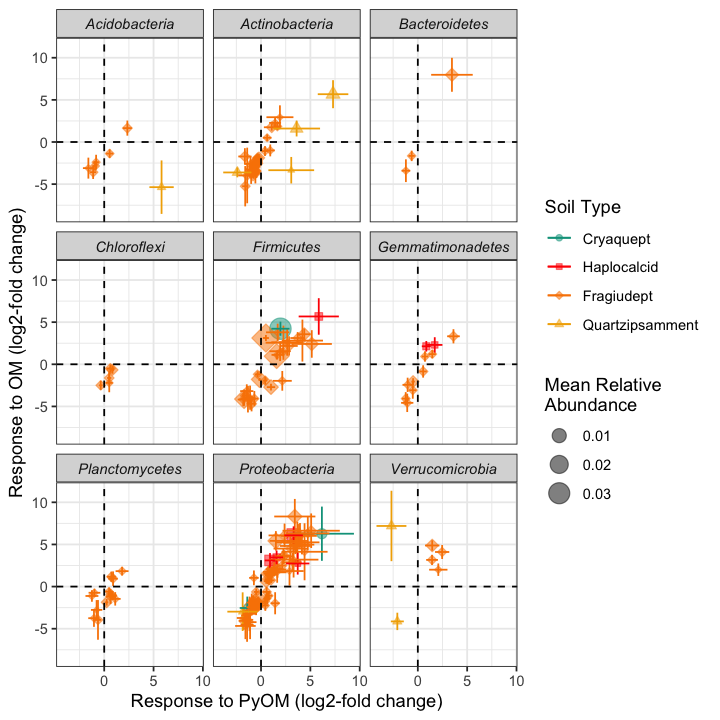

In [198]:
options(repr.plot.width=6, repr.plot.height=6)

# In case we wanted to force inclusion of non-significant responders
#d.plot = d.cast
#d.plot$logFC.OM = ifelse(is.na(d.plot$logFC.padj.OM),0,d.plot$logFC.OM)
#d.plot$logFC.PyOM = ifelse(is.na(d.plot$logFC.padj.PyOM),0,d.plot$logFC.PyOM)

d.plot = d.cast.2%>%
    filter(!is.na(logFC.padj.PyOM) & !is.na(logFC.padj.OM))%>%
    filter(!(Phylum %in% c("BRC1", "Cyanobacteria","Thaumarchaeota")))

d.plot$Soil_Name=d.plot$Soil_Trtmt

d.plot$Soil_Name = ordered(d.plot$Soil_Name, levels = c("Hydrudand", "Cryaquept", "Haplocalcid","Fragiudept","Quartzipsamment"))

p = ggplot(d.plot,aes(x=logFC.PyOM,y=logFC.OM,shape=Soil_Name,color=Soil_Name,fill=Soil_Name))
p = p + theme_bw()
p = p + geom_point(alpha=0.5,aes(size=MeanAbund))
p = p + geom_errorbar(aes(ymin=logFC.OM-1.96*logFC.SE.OM,ymax=logFC.OM+1.96*logFC.SE.OM))
p = p + geom_errorbarh(aes(xmin=logFC.PyOM-1.96*logFC.SE.PyOM,xmax=logFC.PyOM+1.96*logFC.SE.PyOM))
p = p + geom_hline(yintercept = 0.0, linetype=2) + theme_bw()
p = p + geom_vline(xintercept = 0.0, linetype=2) + theme_bw()
p = p + xlab("Response to PyOM (log2-fold change)")
p = p + ylab("Response to OM (log2-fold change)")
p = p + theme(strip.text = element_text(face="italic"))

palette = c(wes_palette("Darjeeling1"),wes_palette("Darjeeling2")[2:4])
palette = palette[c(2,1,4,3,5,6)]
p = p + scale_fill_manual(values=palette)+ scale_color_manual(values=palette) + scale_shape_manual(values=c(21:25))
p = p + guides(size = guide_legend(title="Mean Relative\nAbundance"), shape = guide_legend(title="Soil Type"), color=guide_legend(title="Soil Type"), fill=guide_legend(title="Soil Type"))
p = p + facet_wrap(~Phylum)
p

In [204]:
tax_table(ps.norm)["sq1180"]

,Kingdom,Phylum,Class,Order,Family,Genus,Species
sq1180,Bacteria,Acidobacteria,Acidobacteriia,Solibacterales,Solibacteraceae (Subgroup 3),Candidatus Solibacter,uncultured bacterium


In [201]:
d.plot[d.plot$Phylum=="Acidobacteria",]

,Soil_Trtmt,OTU,Phylum,logFC.OM,logFC.PyOM,logFC.SE.OM,logFC.SE.PyOM,logFC.padj.OM,logFC.padj.PyOM,MeanAbund,Soil_Name
,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
16,Fragiudept,sq1116,Acidobacteria,-2.393159,-0.8211767,0.4482064,0.1432335,2.298939e-07,1.525934e-07,0.0004564657,Fragiudept
59,Fragiudept,sq229,Acidobacteria,-3.582295,-1.1218483,0.4112735,0.1583786,1.722787e-17,3.993129e-11,0.0010421804,Fragiudept
113,Fragiudept,sq575,Acidobacteria,-1.374592,0.5511448,0.2585864,0.1840348,2.598085e-07,1.133502e-02,0.0006719200,Fragiudept
122,Fragiudept,sq642,Acidobacteria,-3.100018,-1.6052495,0.6346585,0.2817259,2.283544e-06,1.835423e-07,0.0001769542,Fragiudept
156,Fragiudept,sq871,Acidobacteria,-2.844653,-0.9312454,0.2663570,0.1249397,1.501285e-25,2.946344e-12,0.0007714331,Fragiudept
169,Fragiudept,sq936,Acidobacteria,1.647877,2.3438636,0.4572503,0.2299928,5.445861e-04,1.346215e-22,0.0012490533,Fragiudept
183,Quartzipsamment,sq1180,Acidobacteria,-5.359352,5.8104055,1.6187421,0.6290101,1.990312e-03,1.386180e-18,0.0003037978,Quartzipsamment


## Who's that 'crobe?

In [163]:
d.plot %>% filter(Soil_Trtmt == "Alaska")
tax_table(ps.norm)["sq8"]

Soil_Trtmt,OTU,logFC.OM,logFC.PyOM,logFC.SE.OM,logFC.SE.PyOM,logFC.padj.OM,logFC.padj.PyOM,Soil_Name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
Alaska,sq2,4.376447,2.105241,0.4047179,0.4484687,1.692188e-25,0.0001738997,NA
Alaska,sq8,-3.734349,3.727234,1.2019266,1.1647533,6.337599e-03,0.0297738650,NA


,Kingdom,Phylum,Class,Order,Family,Genus,Species
sq8,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Massilia,NA


In [181]:
taxtab=matrix(tax_table(ps.norm),ncol=7)
row.names(taxtab) = taxa_names(ps.norm)
colnames(taxtab) = c("Kingdom","Phylum","Class","Order","Family","Genus","Species")
taxtab=data.frame(taxtab)
AllMassilia = row.names(taxtab[!is.na(taxtab$Genus) & taxtab$Genus=="Massilia",])
AllMassilia

[1] "sq5"     "sq8"     "sq22"    "sq37"    "sq53"    "sq55"    "sq74"   
  [8] "sq102"   "sq108"   "sq155"   "sq158"   "sq203"   "sq256"   "sq298"  
 [15] "sq418"   "sq436"   "sq476"   "sq532"   "sq568"   "sq751"   "sq970"  
 [22] "sq1442"  "sq1539"  "sq1665"  "sq1678"  "sq1745"  "sq1955"  "sq1969" 
 [29] "sq2146"  "sq2393"  "sq2657"  "sq2737"  "sq3158"  "sq3994"  "sq4278" 
 [36] "sq4418"  "sq4532"  "sq4849"  "sq4898"  "sq4992"  "sq5066"  "sq6445" 
 [43] "sq6520"  "sq6766"  "sq6940"  "sq7011"  "sq7261"  "sq7422"  "sq7623" 
 [50] "sq8288"  "sq8343"  "sq8899"  "sq9615"  "sq9719"  "sq9808"  "sq10058"
 [57] "sq10097" "sq10563" "sq11315" "sq11892" "sq12143" "sq12211" "sq12597"
 [64] "sq12598" "sq12667" "sq12708" "sq12736" "sq13263" "sq13271" "sq13663"
 [71] "sq13824" "sq14111" "sq14365" "sq14395" "sq14526" "sq14582" "sq15130"
 [78] "sq15193" "sq15408" "sq15598" "sq15765" "sq15811" "sq15930" "sq15938"
 [85] "sq15987" "sq15990" "sq16011" "sq16042" "sq16049" "sq16066" "sq16068"
 [92] "sq16080" "sq16114" "sq16116" "sq16160" "sq16168" "sq16171" "sq16180"
 [99] "sq16195" "sq16212" "sq16226" "sq16228" "sq16233" "sq16253" "sq16255"
[106] "sq16260" "sq16282" "sq16329" "sq16333" "sq16339" "sq16371" "sq16372"
[113] "sq16383" "sq16395" "sq16398" "sq16400" "sq16405" "sq16409" "sq16427"
[120] "sq16435" "sq16469" "sq16473" "sq16476" "sq16478" "sq16486" "sq16519"
[127] "sq16520" "sq16540" "sq16558" "sq16583"

In [186]:
ps.Mas = subset_taxa(ps.norm,taxa_names(ps.norm) %in% AllMassilia)
ps.Mas
ps.Mas.melt = psmelt(ps.Mas)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 130 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 130 taxa by 7 taxonomic ranks ]

In [197]:
df = ps.Mas.melt%>%
    group_by(Day,Soil_Trtmt,Amdmt,OTU,Phylum,Family)%>%
    summarize(Abundance=mean(Abundance))%>%
    mutate(Sample = paste(Soil_Trtmt," ",Amdmt," ",Day))%>%
    mutate(DayAmdmt=paste(Amdmt,Day))
AbundMas = df %>%
    group_by(OTU)%>%
    summarize(meanAbund = mean(Abundance))%>%
    arrange(-meanAbund)
AbundMas = AbundMas[1:20,]
AbundMas
df = df %>%
    filter(OTU %in% AbundMas$OTU)

OTU,meanAbund
<chr>,<dbl>
sq5,0.0232902345
sq8,0.0124521663
sq22,0.0058389136
sq37,0.0040968063
sq55,0.0028273635
sq53,0.0028196189
sq74,0.0018752233
sq108,0.0011740998
sq102,0.0011597507


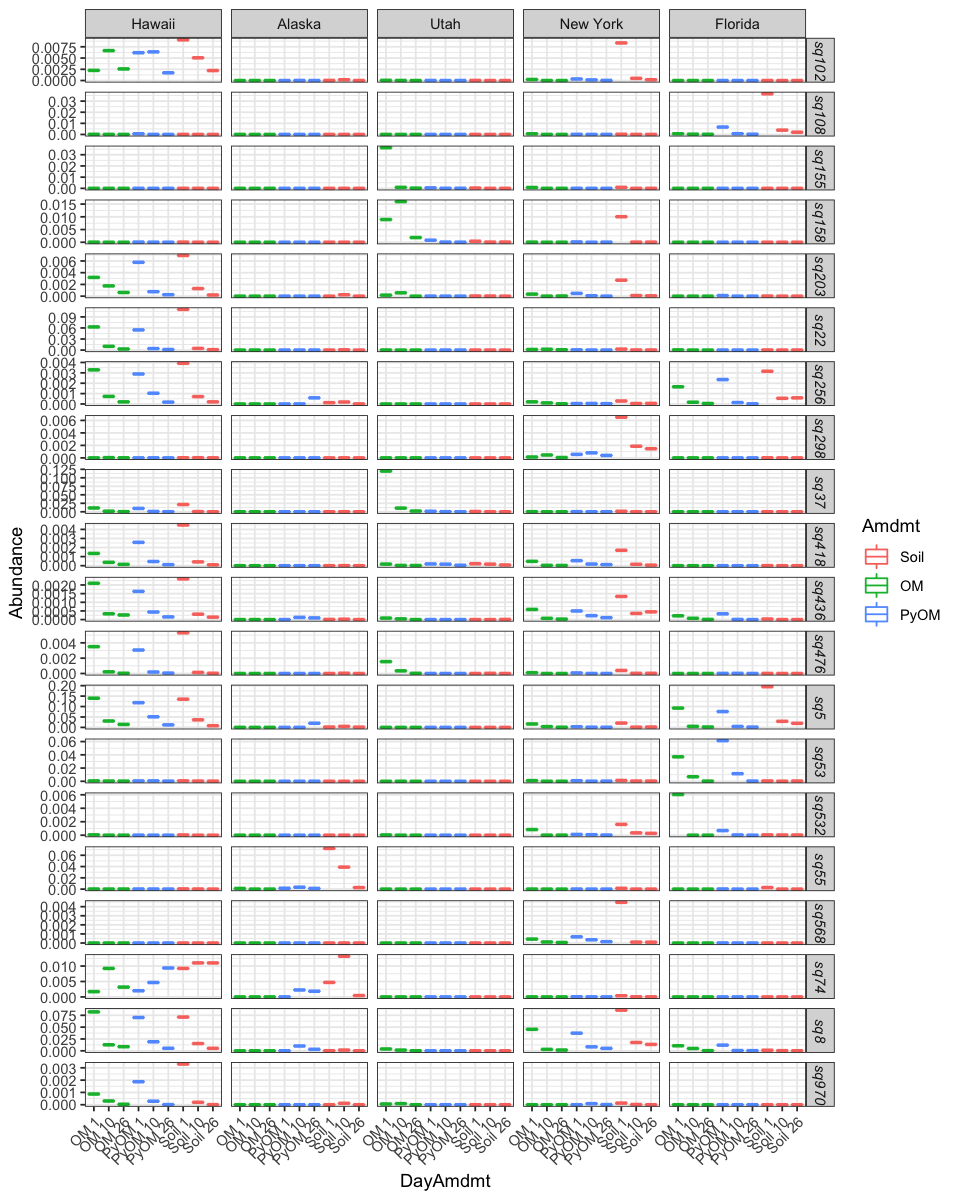

In [201]:
options(repr.plot.width=8, repr.plot.height=10)

p = ggplot(data=df, aes(x=DayAmdmt,y=Abundance,color=Amdmt))
p = p + geom_boxplot()
p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle=45,hjust=1))
#palette = c(wes_palette("Cavalcanti"))
#palette = palette[c(3,1,2)]
#p = p + scale_color_manual(values=palette)
p = p + facet_grid(~OTU~Soil_Trtmt, scales="free")
p = p + theme(strip.text.y = element_text(face="italic"))
p